In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# ss=pd.read_csv('../input/sample_submission.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],keys=['Total','Percent'],axis=1)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [6]:
total=test.isnull().sum().sort_values(ascending=False)
percent=(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],keys=['Total','Percent'],axis=1)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [7]:
col=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
train.drop(columns=col,axis=1,inplace=True)
test.drop(columns=col,axis=1,inplace=True)
print(train.shape)
print(test.shape)

(1460, 76)
(1459, 75)


In [8]:
train.LotFrontage.fillna(round(train.LotFrontage.mean(),0),inplace=True)# replacing the missing value by its mean

In [9]:
train.GarageYrBlt.fillna(train.YearBuilt,inplace=True) # replacing the missing value by the year garage was built

In [10]:
train[train.MasVnrArea.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.0,7851,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,70.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2008,WD,Normal,237000


In [11]:
train.MasVnrArea.fillna(round(train[train.ExterQual=='Gd'].MasVnrArea.mean(),0),inplace=True)

In [12]:
train.GarageCond.fillna('TA',inplace=True)# if you check the mode for the function it give the values used to fill it
train.GarageType.fillna('Attchd',inplace=True)
train.GarageFinish.fillna('Unf',inplace=True)
train.GarageQual.fillna('TA',inplace=True)
train.BsmtExposure.fillna('No',inplace=True)
train.BsmtQual.fillna('Gd',inplace=True)
train.BsmtCond.fillna('TA',inplace=True)
train.BsmtFinType1.fillna('GLQ',inplace=True)
train.BsmtFinType2.fillna('Unf',inplace=True)
train.MasVnrType.fillna('None',inplace=True)
train.Electrical.fillna('SBrkr',inplace=True)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

In [14]:
test.LotFrontage.fillna(round(test.LotFrontage.mean(),0),inplace=True)# Filled the null value exactly same way done in training data set
test.GarageYrBlt.fillna(test.YearBuilt,inplace=True)
test.MasVnrArea.fillna(round(test[test.ExterQual=='Gd'].MasVnrArea.mean(),0),inplace=True)
test.BsmtFullBath.fillna(round(test.BsmtFullBath.mean(),0),inplace=True)
test.BsmtHalfBath.fillna(round(test.HalfBath.mean(),0),inplace=True)
test.BsmtUnfSF.fillna(round(test.BsmtUnfSF.mean(),0),inplace=True)
test.TotalBsmtSF.fillna(round(test.TotalBsmtSF.mean(),0),inplace=True)
test.GarageArea.fillna(round(test.GarageArea.mean(),0),inplace=True)
test.GarageCars.fillna(2.0,inplace=True)#the mode value of Garage Cars
test.BsmtFinSF1.fillna(round(test.BsmtFinSF1.mean(),0),inplace=True)
test.BsmtFinSF2.fillna(round(test.BsmtFinSF2.mean(),0),inplace=True)

In [15]:
#the mode value of each of the attributes
test.GarageCond.fillna('TA',inplace=True)
test.GarageQual.fillna('TA',inplace=True)
test.GarageFinish.fillna('Unf',inplace=True)
test.GarageType.fillna('Attchd',inplace=True)
test.BsmtQual.fillna('TA',inplace=True)
test.BsmtCond.fillna('TA',inplace=True)
test.BsmtExposure.fillna('No',inplace=True)
test.BsmtFinType1.fillna('GLQ',inplace=True)
test.BsmtFinType2.fillna('Unf',inplace=True)
test.MasVnrType.fillna('None',inplace=True)
test.MSZoning.fillna('RL',inplace=True)
test.Utilities.fillna('AllPub',inplace=True)
test.Functional.fillna('Typ',inplace=True)
test.SaleType.fillna('WD',inplace=True)
test.KitchenQual.fillna('TA',inplace=True)
test.Exterior2nd.fillna('VinylSd',inplace=True)
test.Exterior1st.fillna('VinylSd',inplace=True)

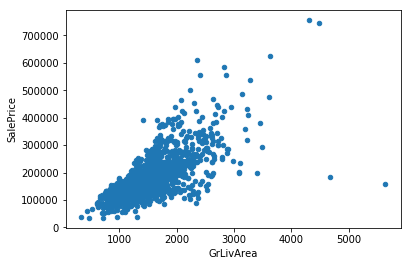

In [16]:
data=pd.concat([train['SalePrice'],train['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

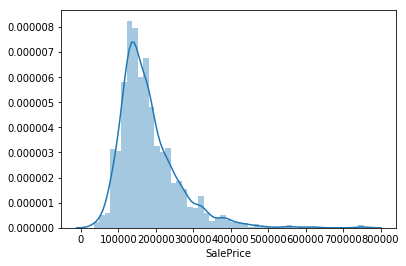

<Figure size 432x288 with 0 Axes>

In [17]:
sns.distplot(train['SalePrice'])
fig=plt.figure()

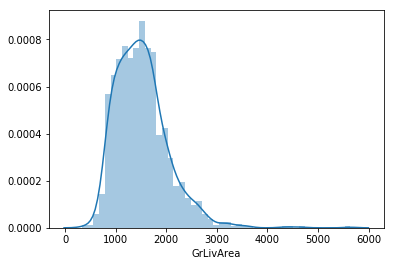

<Figure size 432x288 with 0 Axes>

In [18]:
sns.distplot(train['GrLivArea'])
fig=plt.figure()

In [19]:
#above Diagram shows the SalePrice and GrLivArea is not normally distributes and has an exponential realtion.
#  applying log transformation
train['SalePrice']=np.log(train['SalePrice'])
train['GrLivArea']=np.log(train['GrLivArea'])
test['GrLivArea']=np.log(test['GrLivArea'])
tid=test.Id

In [20]:
sample=pd.get_dummies(train)
test1=pd.get_dummies(test)
print(sample.shape)
print(test1.shape)

(1460, 272)
(1459, 255)


In [21]:
sample.columns.difference(test1.columns)

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa'],
      dtype='object')

In [22]:
col=['Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','Electrical_Mix','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other','GarageQual_Ex','Heating_Floor','Heating_OthW','HouseStyle_2.5Fin','RoofMatl_ClyTile','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','Utilities_NoSeWa']
# sample.drop(col,axis=1,inplace=True)
# sample.shape
for i in col:
    test1[i]=0
print(test1.shape)

(1459, 271)


In [23]:
target=sample.SalePrice
x=sample.drop('SalePrice',axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200)
pc=pca.fit_transform(x)
ar=pca.explained_variance_ratio_
print(np.sum(ar))
pc1=pca.transform(test1)
principaldf=pd.DataFrame(pc)
print(principaldf.shape)
testdf=pd.DataFrame(pc1)
trgt=pd.DataFrame(data=target)
trgt.columns=['SalePrice']
s1=pd.concat([principaldf,trgt],axis=1)

0.9873482702360696
(1460, 200)


In [26]:
# sns.distplot(s1['SalePrice'])
# fig=plt.figure()
# data=pd.concat([s1[0],s1['SalePrice']],axis=1)
# data.plot.scatter(x=0,y='SalePrice')

In [27]:
s1.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,SalePrice
0,4.291128,1.657715,-2.125246,-1.900433,0.888880,-1.267005,1.157460,0.494095,-1.491325,-0.517090,...,-0.136970,0.088232,-0.134320,-0.222684,-0.293416,0.169838,-0.129469,-0.290447,0.090485,12.247694
1,-0.186253,-3.121098,-0.551574,0.073095,-0.060644,-0.578688,-0.981526,0.292308,-0.902724,-0.415581,...,0.426008,0.071815,-0.197267,-0.413705,0.750306,-0.104850,-0.041584,-0.408484,-0.206941,12.109011
2,4.838650,1.143060,-1.447069,-1.854423,1.151465,-1.962381,0.739108,0.635955,-1.610846,0.104769,...,-0.311314,0.313201,-0.150948,0.000755,-0.111773,-0.135666,-0.102725,-0.104306,0.056070,12.317167
3,-1.992637,1.164926,1.834447,-1.951185,-0.700640,-0.837180,-2.025412,0.407127,0.938047,0.513010,...,-0.622766,-0.613263,1.366141,-0.005834,0.190720,0.252713,-1.144901,-0.262624,0.136996,11.849398
4,6.467974,0.859711,0.466062,-3.298018,0.950595,-0.876115,1.474575,1.016913,-2.262472,0.660820,...,-0.120617,0.168689,-0.091051,-0.053521,0.268363,-0.426940,-0.008402,-0.449664,0.208141,12.429216


In [28]:
from sklearn.model_selection import cross_val_score,train_test_split
x_train,x_val,y_train,y_val=train_test_split(principaldf,trgt,test_size=0.3,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1022, 200)
(1022, 1)
(438, 200)
(438, 1)


In [29]:
from sklearn.ensemble import RandomForestRegressor
clf_rf=RandomForestRegressor(random_state=42)
cr=clf_rf.fit(x_train,y_train)
y_pred=cr.predict(x_val)
y_pred=pd.DataFrame(y_pred)
y1=y_val.reset_index(drop=True)
y_pred.columns=['value']
error=(y_pred['value']-trgt['SalePrice'])**2
print("mean root mean square error: ",np.sqrt(np.mean(error)))
mape=(np.sqrt(error)/trgt['SalePrice'])*100
accuracy=100-np.mean(mape)
print("Accuracy Score",accuracy)
print("rsquare Score",cr.score(x_val,y_val))

E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


mean root mean square error:  0.5435194735724017
Accuracy Score 96.35699174596286
rsquare Score 0.8269702176990649


In [30]:
from sklearn.svm import SVR
sr=SVR(kernel='poly')
sr.fit(x_train,y_train)
y_pred=sr.predict(x_val)
y_pred=pd.DataFrame(y_pred)
y_pred.columns=['value']
error=(y_pred['value']-trgt['SalePrice'])**2
print("mean root mean square error: ",np.sqrt(np.mean(error)))
mape=100*(np.sqrt(error)/trgt['SalePrice'])
accuracy=100-np.mean(mape)
print("Accuracy Score",accuracy)
print("r square score",sr.score(x_val,y_val))

E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


mean root mean square error:  0.5208842199381035
Accuracy Score 96.5941905314566
r square score 0.8269869930323076


In [31]:
# submission=cr.predict(testdf)   # submission of the test data at kaggle using random forest regression
# submission=pd.DataFrame(submission)
# submission.columns=['SalePrice']
# tid=pd.DataFrame(tid)
# sub_RFR=pd.concat([tid,submission],axis=1)
# sub_RFR.to_csv("Submission_RFR.csv",index=False)

In [32]:
# submission=sr.predict(testdf)   # submission of the test data at kaggle using Support Vector regression
# submission=pd.DataFrame(submission)
# submission.columns=['SalePrice']
# sub_SVR=pd.concat([tid,submission],axis=1)
# sub_SVR.to_csv("Submission_SVR.csv",index=False)
# sub_SVR.head()